In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
import logging
from typing import Tuple, Dict, List
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


**1. Veri Yükleme ve İnceleme**
Veri Yükleme: CSV formatındaki veri seti yükleniyor


In [5]:
df=pd.read_csv('/content/drive/MyDrive/churn_train.csv')

**head() fonksiyonu ile ilk birkaç satır inceleniyor.**

In [6]:
df.head()


,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,202550,1835,0,1,9.66,2.26,1,1,...,45.35,0.0,26.62,0.00,390,10,115,10,0.0,0
1,2013,6,930164,536,0,10,54.92,0.60,1,1,...,24.98,0.0,23.90,0.00,52,0,52,0,0.0,0
2,2013,6,46907,1046,0,1,16.25,13.47,1,1,...,116.47,15.2,65.65,31.28,262,0,199,11,0.0,0
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.0,0
4,2013,6,300131,1630,0,1,6.14,3.76,1,1,...,30.38,0.0,8.00,0.00,61,0,60,0,0.0,0


 **describe().T** ile sayısal sütunların özet istatistikleri alınıyor. Ayrıca, veri setindeki sütun adları yazdırılıyor.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,60000.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.0,2013.00
month,60000.0,6.257100,0.662827,6.0,6.00,6.0,6.0,8.00
user_account_id,60000.0,595438.501883,429315.250236,13.0,251111.25,413509.5,1041391.0,1196944.00
user_lifetime,60000.0,4010.707750,6062.226966,0.0,456.00,1217.0,1985.0,15947.00
user_intake,60000.0,0.041083,0.198485,0.0,0.00,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...
last_100_sms_outgoing_to_onnet_count,60000.0,7.273817,35.763351,0.0,0.00,0.0,1.0,2829.00
last_100_sms_outgoing_to_offnet_count,60000.0,62.447717,187.079702,0.0,0.00,5.0,51.0,13860.00
last_100_sms_outgoing_to_abroad_count,60000.0,3.049600,25.564016,0.0,0.00,0.0,0.0,4692.00
last_100_gprs_usage,60000.0,5.660140,71.594183,0.0,0.00,0.0,0.0,5571.22


**Veri Temizleme ve Ön İşleme**
user_account_id Sütununun Kaldırılması:
user_account_id  Çünkü bu sütun model için faydalı olmayabilir **bold text** **bold text**

In [8]:
print(list(df.columns))

['year', 'month', 'user_account_id', 'user_lifetime', 'user_intake', 'user_no_outgoing_activity_in_days', 'user_account_balance_last', 'user_spendings', 'user_has_outgoing_calls', 'user_has_outgoing_sms', 'user_use_gprs', 'user_does_reload', 'reloads_inactive_days', 'reloads_count', 'reloads_sum', 'calls_outgoing_count', 'calls_outgoing_spendings', 'calls_outgoing_duration', 'calls_outgoing_spendings_max', 'calls_outgoing_duration_max', 'calls_outgoing_inactive_days', 'calls_outgoing_to_onnet_count', 'calls_outgoing_to_onnet_spendings', 'calls_outgoing_to_onnet_duration', 'calls_outgoing_to_onnet_inactive_days', 'calls_outgoing_to_offnet_count', 'calls_outgoing_to_offnet_spendings', 'calls_outgoing_to_offnet_duration', 'calls_outgoing_to_offnet_inactive_days', 'calls_outgoing_to_abroad_count', 'calls_outgoing_to_abroad_spendings', 'calls_outgoing_to_abroad_duration', 'calls_outgoing_to_abroad_inactive_days', 'sms_outgoing_count', 'sms_outgoing_spendings', 'sms_outgoing_spendings_max', 

In [9]:
df = df.drop(['user_account_id'], axis = 1)

Bu kod bloğu, veri kümesindeki tüm sayısal sütunların dağılımını görselleştirmek için kullanılır. Bu görselleştirme sayesinde verilerin dağılımı, çarpıklığı (skewness), aykırı değerlerin varlığı gibi önemli yapısal özellikler tespit edilerek, sonraki adımlarda uygulanacak ön işleme kararlarına (örneğin log dönüşümü veya aykırı değer temizleme gibi) temel oluşturulur.

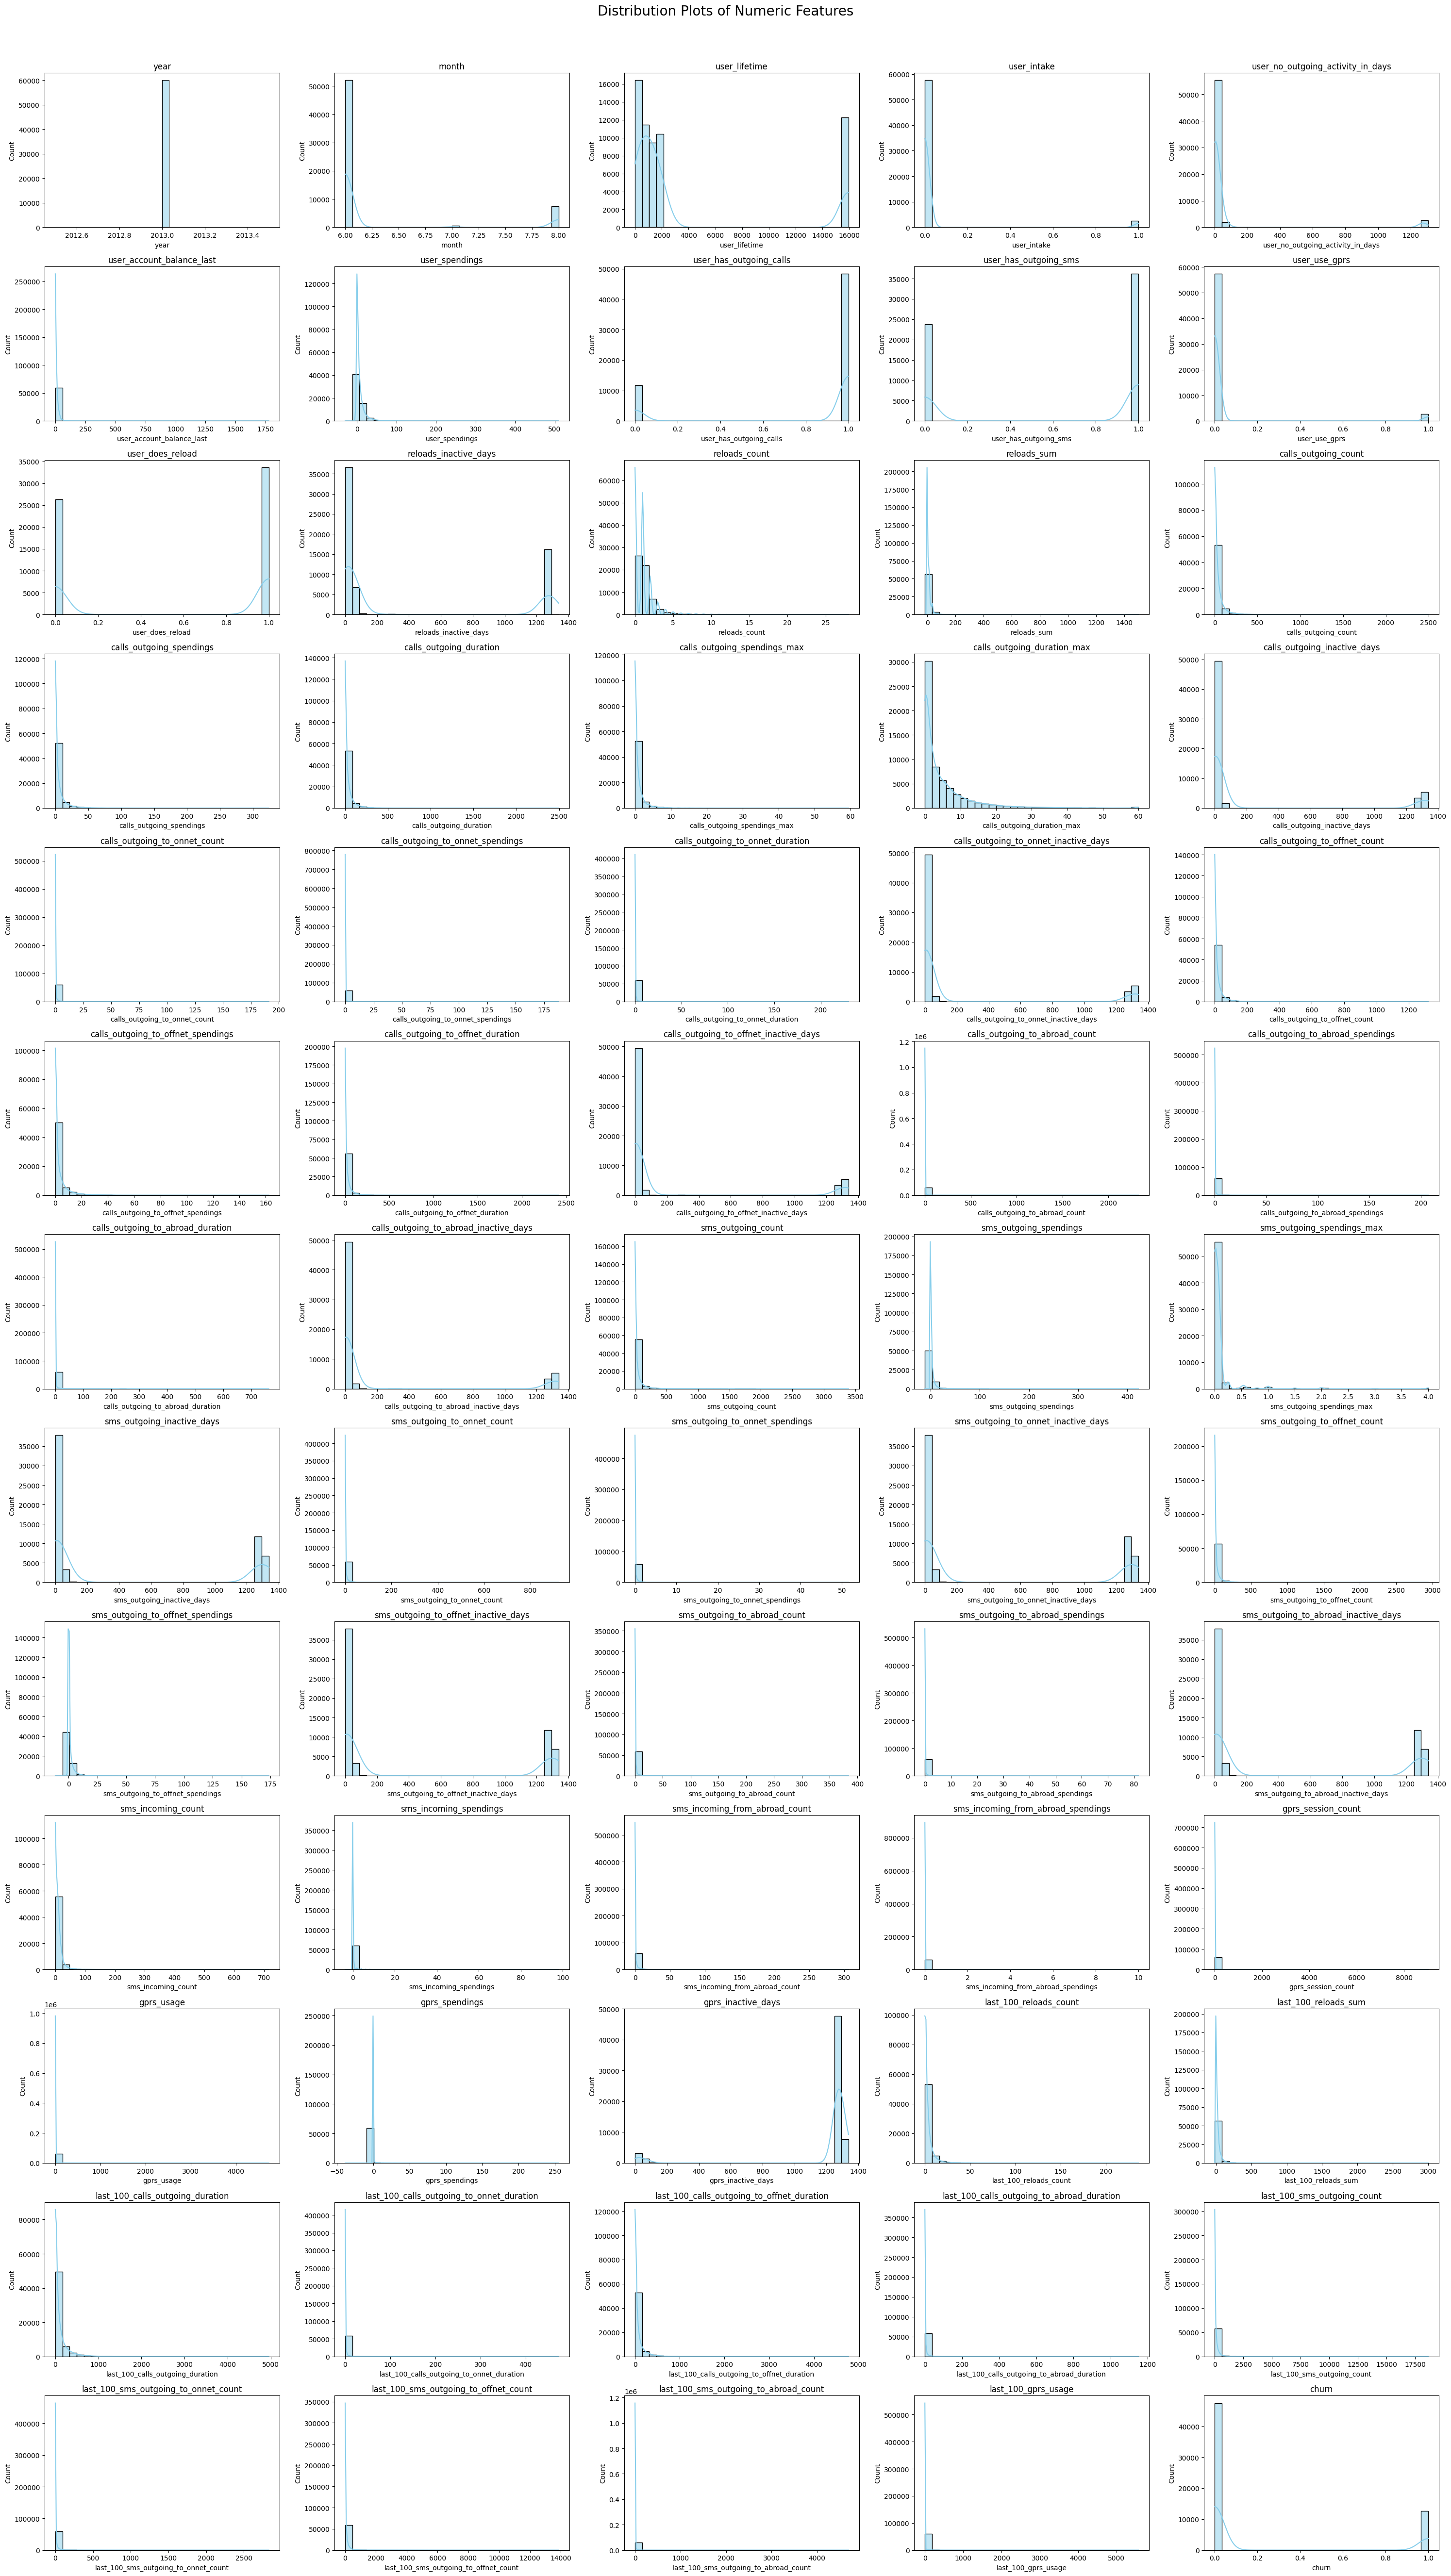

In [10]:
# Sadece sayısal sütunları al
numeric_cols = df.columns

# Ayar: grafik başına kaç plot çizilecek
plots_per_row = 5
total_plots = len(numeric_cols)
rows = (total_plots + plots_per_row - 1) // plots_per_row

# Plot
plt.figure(figsize=(plots_per_row * 6, rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, plots_per_row, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribution Plots of Numeric Features", fontsize=20, y=1.02)
plt.show()


bu fonksiyon her sayısal sütunun ne kadarının istatistiksel olarak aykırı değer içerdiğini gösteren bir yüzde listesi döndürür ve bu liste üzerinden hangi sütunlarda yüksek oranda aykırı değer bulunduğu anlaşılabilir. Bu bilgi, sonraki adımlarda yapılacak aykırı değer işleme stratejileri (örneğin, aykırıları etiketleme, silme veya dönüşüm uygulama) için temel sağlar.

In [ ]:
def get_outlier_percentages_list(df):
    outlier_percentages = []
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        outlier_percentages.append(round(outlier_percentage, 2))

    return outlier_percentages

# Örnek kullanım:
outlier_percentage_list = get_outlier_percentages_list(df)
print(sorted(outlier_percentage_list))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 3.06, 3.35, 4.11, 4.22, 4.51, 4.51, 4.53, 5.44, 5.44, 5.71, 6.4, 6.53, 6.75, 6.79, 7.22, 7.72, 8.05, 8.16, 8.21, 8.55, 8.72, 9.48, 9.5, 9.66, 9.73, 9.78, 9.91, 9.94, 10.38, 10.72, 10.84, 10.98, 11.2, 11.72, 12.35, 12.38, 12.45, 13.12, 13.29, 13.61, 14.3, 14.51, 18.62, 18.62, 18.62, 18.62, 18.9, 19.28, 19.39, 19.53, 20.43, 20.91, 20.96, 21.05, 21.88, 22.05]


Bu kod parçası, veri kümesindeki aykırı değeri %10’dan fazla olan sütunları belirleyip, her biri için aykırılık bayrağı . İlk olarak son sütun (hedef değişken olan churn) hariç tutulur, ardından daha önce hesaplanan aykırılık yüzdelerine göre %10’un üzerinde aykırıya sahip sütunlar seçilir. Daha sonra bu sütunlar için IQR yöntemi kullanılarak her satıra aykırı olup olmadığını gösteren yeni bir sütun (_outlier ekiyle) eklenir. Böylece modelleme aşamasında bu aykırılık bilgileri de kullanılabilir hale gelir.

In [ ]:

cols = df.columns[:-1]

# %10'dan fazla aykırısı olan sütunlar
high_outlier_cols = [col for col, perc in zip(cols, outlier_percentage_list) if perc > 10]

# Aykırı bayraklarını ekle
def add_outlier_flags(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[f"{col}_outlier"] = ((df[col] < lower) | (df[col] > upper)).astype(int)
    return df

# Uygula
df = add_outlier_flags(df, high_outlier_cols)

print(f"{len(high_outlier_cols)} kolon için aykırılık bayrağı eklendi.")


27 kolon için aykırılık bayrağı eklendi.


Bu kod, dağılımı çarpık (skewness > 1 veya < -1) olan ve tüm değerleri pozitif olan sütunları belirler; çünkü log dönüşüm yalnızca pozitif değerlere uygulanabilir. Böylece log dönüşümü ile normalize edilmesi gereken değişkenler tespit edilir.

**Note:** Log dönüşümünü, dağılımı çok çarpık olan (sağa ya da sola yatık) sayısal değişkenleri daha simetrik (normal dağılıma yakın) hâle getirmek için yaptın. Bu, modelin öğrenmesini kolaylaştırır, aşırı uç değerlerin etkisini azaltır ve özellikle doğrusal modellerde veya ağaç temelli modellerde daha iyi performans sağlar. Kısacası, veriyi daha dengeli ve işlenebilir hale getirmek için log dönüşümü uyguladım.

In [ ]:
from scipy.stats import skew
import numpy as np

# Negatif değer varsa log dönüşüm yapılamaz, o yüzden önce pozitif olanları filtrele
positive_cols = [col for col in df.columns if (df[col] > 0).all()]
skewed_features = {}

for col in positive_cols:
    sk = skew(df[col])
    if abs(sk) > 1:
        skewed_features[col] = sk

# Sonuç: log dönüşüm düşünebileceğin kolonlar
print("Log dönüşüm için uygun olan sütunlar (skew > 1 veya < -1):")
print(skewed_features)


Log dönüşüm için uygun olan sütunlar (skew > 1 veya < -1):
{'month': np.float64(2.2192623963961933)}


<ipython-input-18-bf8f6763b11c>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(df[col])


In [ ]:
df['month_log'] = np.log1p(df['month'])


Bu kod bloğu, veri kümesindeki varyansı çok düşük olan sütunları tespit etmek için kullanılır. Varyans, bir özelliğin değerlerinin ne kadar değiştiğini gösterir. Eğer bir sütunun varyansı çok düşükse (örneğin 0.01'den küçükse), bu sütun veri kümesine anlamlı bir katkı sağlamaz çünkü neredeyse tüm satırlarda benzer veya aynı değeri alır. Bu nedenle bu tür sütunlar genellikle modelden çıkarılır. Sonuç olarak, bu kod varyansı 0.01’in altında olan sütunları bulur ve "low_variance_cols" listesinde saklar. Bu liste, ileride modellemeye dahil etmeyeceğim düşük bilgi içeren sütunları gösterir.

In [ ]:
import pandas as pd

# varyans eşik değeri
threshold = 0.01

# varyansı düşük olan sütunları bul
low_variance_cols = df.var()[df.var() < threshold].index.tolist()

print("Düşük varyanslı sütunlar:", low_variance_cols)


Düşük varyanslı sütunlar: ['year', 'sms_incoming_from_abroad_spendings', 'month_log']


varyansı çok düşük olan sütunları kaldırdım

In [ ]:
df.drop(columns=['year', 'sms_incoming_from_abroad_spendings', 'month_log'], inplace=True)


In [ ]:
df.head(5)

,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,...,sms_outgoing_to_offnet_spendings_outlier,sms_incoming_from_abroad_count_outlier,gprs_inactive_days_outlier,last_100_calls_outgoing_to_onnet_duration_outlier,last_100_calls_outgoing_to_offnet_duration_outlier,last_100_calls_outgoing_to_abroad_duration_outlier,last_100_sms_outgoing_count_outlier,last_100_sms_outgoing_to_onnet_count_outlier,last_100_sms_outgoing_to_offnet_count_outlier,last_100_sms_outgoing_to_abroad_count_outlier
0,6,202550,1835,0,1,9.66,2.26,1,1,0,...,0,0,0,0,0,0,1,1,0,1
1,6,930164,536,0,10,54.92,0.60,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,6,46907,1046,0,1,16.25,13.47,1,1,0,...,1,1,0,1,0,1,1,0,1,1
3,8,1174456,15947,0,8,0.00,0.00,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,300131,1630,0,1,6.14,3.76,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Bu kod, veri setindeki sayısal sütunlar arasındaki korelasyonları hesaplar ve bir ısı haritası ile görselleştirir. Ardından, korelasyonu 0.9'dan büyük olan sütunları tespit eder. Bu sütunlar, birbirine çok benzediğinden biri çıkarılabilir. Bu adım, modelde gereksiz tekrarları ortadan kaldırarak veriyi sadeleştirir.

In [ ]:
# Korelasyon matrisini hesapla
corr_matrix = df.corr()

# Korelasyonu yüksek olanları görselleştirelim
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

# Korelasyonu yüksek olan sütunlar (>0.8 veya <-0.8) seçelim
high_corr = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # 0.9'den büyük olanlar
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

# Yüksek korelasyonlu sütunları gör
high_corr


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(len(high_corr))

20


Bu kod, verideki yüksek korelasyona sahip sütunları çıkararak, temsilci olarak seçilen belirli sütunları ve düşük korelasyonlu diğer sütunları birleştirir. Sonuç olarak, gereksiz tekrarlar ortadan kaldırılır ve veri seti daha anlamlı hale gelir. Sonuçta, df_final adında bu seçilen sütunlardan oluşan yeni bir veri seti oluşturulur.

In [ ]:
# 1. Tüm sütunları al
all_columns = set(df.columns)

# 3. Temsilci olarak seçeceğin sütunlar
selected_representatives = {
    'calls_outgoing_to_offnet_duration',
    'calls_outgoing_to_onnet_inactive_days',
    'calls_outgoing_to_abroad_inactive_days',
    'sms_outgoing_to_offnet_spendings',
    'sms_outgoing_to_onnet_spendings_outlier',
    'last_100_calls_outgoing_to_offnet_duration',
    'gprs_usage',
    'user_lifetime_outlier',
    'churn'
}

# 4. Düşük korelasyonlu ve tekil kalan sütunları ekle
remaining_columns = all_columns - high_corr
final_columns = selected_representatives.union(remaining_columns)

# 5. Yeni veri setini oluştur
df_final = df[list(final_columns)]



In [ ]:
df_final.head(5)

,last_100_calls_outgoing_to_offnet_duration,sms_outgoing_spendings_max,calls_outgoing_to_onnet_inactive_days,reloads_count,calls_outgoing_to_offnet_spendings,sms_outgoing_to_onnet_spendings,sms_outgoing_to_onnet_count_outlier,calls_outgoing_to_onnet_spendings,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration_outlier,...,last_100_sms_outgoing_to_onnet_count,user_use_gprs,last_100_sms_outgoing_to_abroad_count,gprs_usage,calls_outgoing_spendings,sms_outgoing_to_onnet_count,gprs_inactive_days_outlier,calls_outgoing_to_abroad_spendings,calls_outgoing_to_abroad_count,calls_outgoing_to_abroad_duration
0,26.62,0.06,1,2,1.27,0.0,0,0.00,45.35,0,...,10,0,10,0.0,1.42,0,0,0.00,0,0.00
1,23.90,0.06,10,0,0.00,0.0,0,0.00,24.98,0,...,0,0,0,0.0,0.00,0,0,0.00,0,0.00
2,65.65,0.11,1,2,2.29,0.0,0,5.47,116.47,1,...,0,0,11,0.0,9.30,0,0,7.02,12,31.78
3,0.00,0.00,8,1,0.00,0.0,0,0.00,0.00,0,...,0,0,0,0.0,0.00,0,1,0.00,0,0.00
4,8.00,0.11,1,1,1.26,0.0,0,0.00,30.38,0,...,0,0,0,0.0,2.21,0,0,0.00,0,0.00


Bu kod, veriyi ölçeklendirmek için StandardScaler kullanır. İlk olarak, bağımsız değişkenler (X) ile bağımlı değişkeni (y) ayırır. Daha sonra, StandardScaler ile bağımsız değişkenlerin değerlerini normalize eder (yani ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür). Bu işlem, modelin daha iyi performans göstermesini sağlar çünkü bazı algoritmalar, özelliklerin farklı ölçeklere sahip olmasından olumsuz etkilenebilir. Sonuç olarak, X_scaled değişkeni, ölçeklendirilmiş veriyi içerir.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Bağımsız ve bağımlı değişkenleri ayıralım
X = df_final.drop(columns='churn')
y = df_final['churn']

# Ölçekleyici oluştur
scaler = StandardScaler()

# X'e fit et ve dönüştür
X_scaled = scaler.fit_transform(X)


In [ ]:
print(df['churn'].value_counts())
print(df['churn'].dtype)


churn
0    47451
1    12549
Name: count, dtype: int64
int64


In [ ]:
print(X_scaled)

[[-0.26940253 -0.09362185 -0.42668462 ... -0.1139851  -0.11386192
  -0.12294803]
 [-0.28756779 -0.09362185 -0.4071587  ... -0.1139851  -0.11386192
  -0.12294803]
 [-0.00874431  0.08461834 -0.42668462 ...  2.52705964  0.80612081
   3.17602431]
 ...
 [ 2.31133422  5.03969573 -0.42668462 ... -0.1139851  -0.11386192
  -0.12294803]
 [-0.44718172 -0.30751008  2.47399994 ... -0.1139851  -0.11386192
  -0.12294803]
 [ 0.28343599 -0.09362185 -0.42668462 ... -0.1139851  -0.11386192
  -0.12294803]]


Bu kod, veriyi eğitim ve test setlerine ayırmak için train_test_split fonksiyonunu kullanır. Verinin %30'u test seti olarak ayrılır, geri kalan %70'i ise eğitim seti olarak kullanılır. random_state=42, veri ayrımının her çalıştırmada aynı şekilde yapılmasını sağlar (yani rastgelelikin kontrol altına alınmasını sağlar). stratify=y parametresi, test setindeki sınıfların (örneğin churn ve non-churn) oranın, eğitim setiyle aynı oranda olmasını sağlar. Bu, sınıf dengesizliklerinin test sonuçlarını etkilemesini engeller.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Bu kod, bir Random Forest sınıflandırıcı modelini eğitir ve test verisi üzerinde tahminler yaparak performansını değerlendirir. Model, eğitim verisiyle eğitildikten sonra, test verisi üzerinden tahminler (y_pred) ve pozitif sınıf olasılıklarını (y_proba) üretir. Ardından, sınıflandırma raporu ve ROC AUC skoru hesaplanarak modelin doğruluğu ve sınıflandırma başarısı değerlendirilir.

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # ROC AUC için

# Performans değerlendirme
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14235
           1       0.72      0.62      0.67      3765

    accuracy                           0.87     18000
   macro avg       0.81      0.78      0.79     18000
weighted avg       0.87      0.87      0.87     18000

ROC AUC Score: 0.8956778529250286


Bu kod, XGBoost sınıflandırıcı modelini oluşturur ve eğitir. XGBClassifier, ikili sınıflandırma için binary:logistic hedef fonksiyonu ve logloss değerlendirme metriği ile yapılandırılmıştır. scale_pos_weight=3.78, sınıf dengesizliğini dengelemek amacıyla pozitif sınıfın ağırlığını ayarlamak için kullanılır. Model, X_train ve y_train verileriyle eğitilir.

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=3.78  # Sınıf dengesizliği için: 47451 / 12549 ≈ 3.78
)

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.94      0.86      0.90     14235
           1       0.60      0.81      0.69      3765

    accuracy                           0.85     18000
   macro avg       0.77      0.83      0.79     18000
weighted avg       0.87      0.85      0.85     18000

ROC AUC Score: 0.8986512024726291


Bu kod, SHAP (SHapley Additive exPlanations) kullanarak XGBoost modelinin özelliklerin önemini analiz eder. İlk olarak, shap.Explainer ile modelin açıklayıcısı oluşturulur. Ardından, explainer(X_test) fonksiyonu ile test verisi üzerindeki SHAP değerleri hesaplanır. Son olarak, shap.summary_plot fonksiyonu ile tüm özelliklerin model kararlarına olan etkisi görselleştirilir. Bu plot, her özelliğin modeldeki katkısını ve dağılımını gösterir.

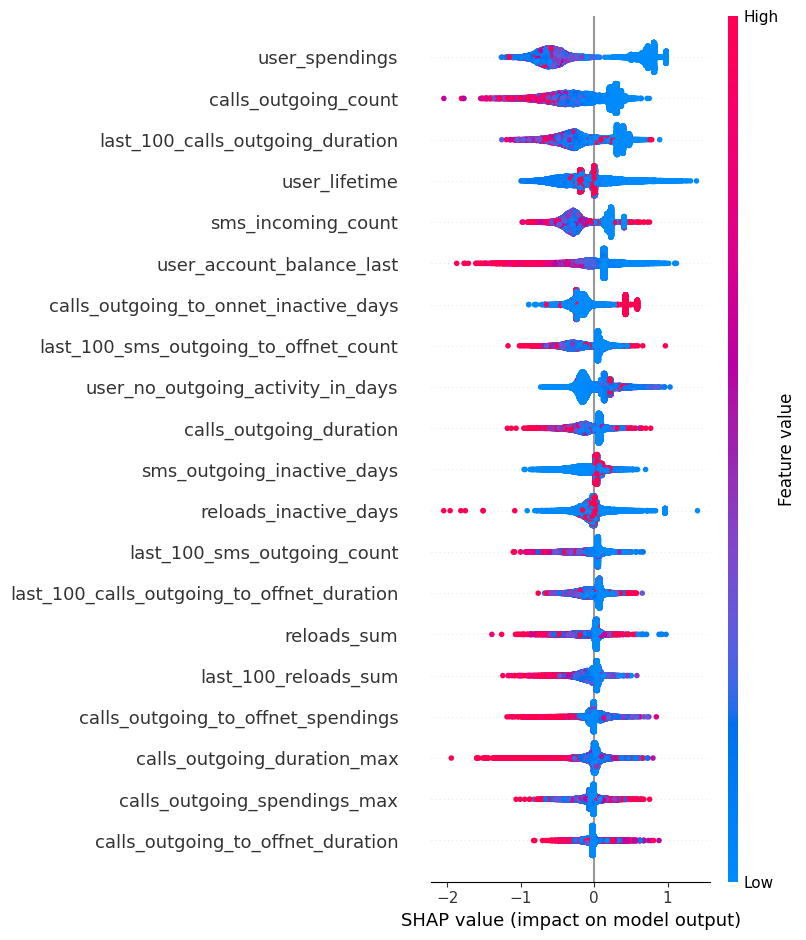

In [ ]:
import shap
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


Bu kod, XGBoost modelinin en önemli 20 özelliğini görselleştirir. İlk olarak, modelin özellik önemlerini (xgb_clf.feature_importances_) alır ve bunları bir DataFrame'e yerleştirir. Ardından, bu özellikleri önem sırasına göre sıralar ve sns.barplot kullanarak en önemli 20 özelliği yatay çubuk grafikte gösterir. Grafik, modelin hangi özelliklere en fazla dikkat ettiğini görselleştirir.

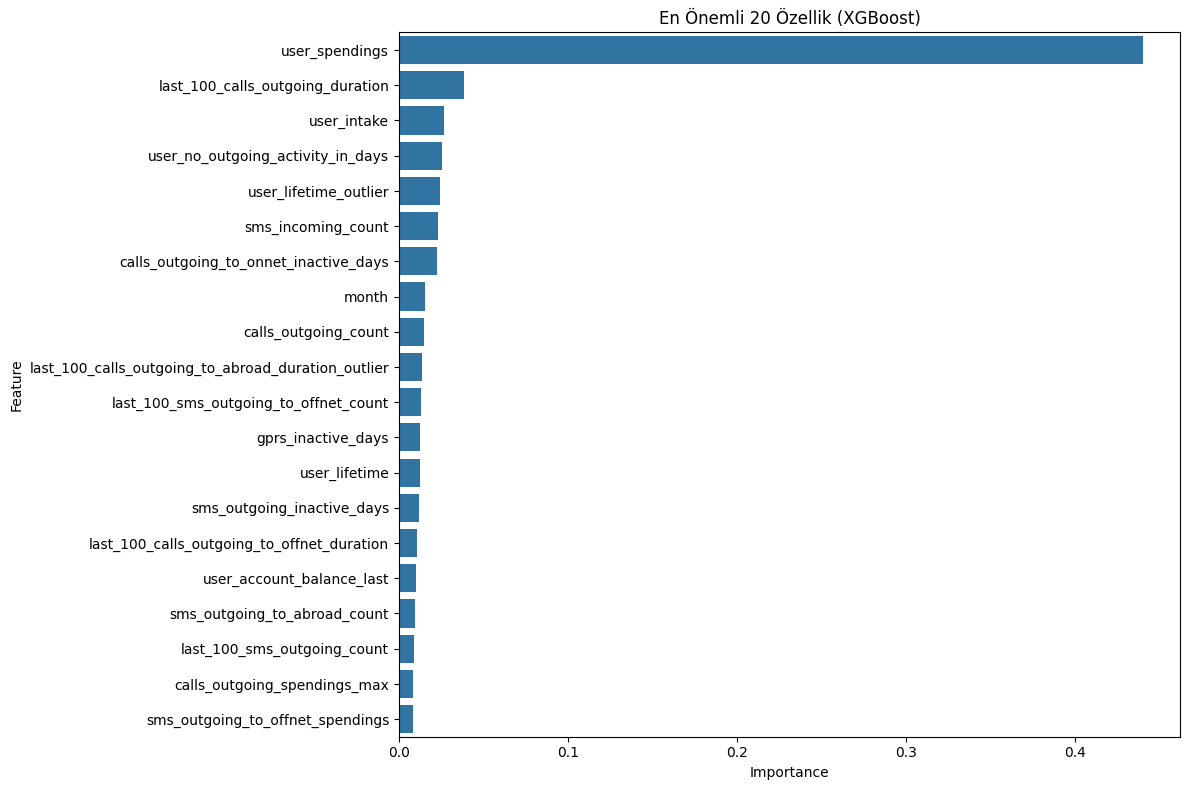

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik önemlerini al
importances = xgb_clf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Önem sırasına göre sırala
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('En Önemli 20 Özellik (XGBoost)')
plt.tight_layout()
plt.show()


Bu kod, XGBoost modelinin hiperparametrelerini optimize etmek için Grid Search kullanır. Öncelikle, param_grid sözlüğü, max_depth, learning_rate, n_estimators, subsample, ve colsample_bytree gibi parametrelerin farklı değerlerini içerir. Ardından, GridSearchCV kullanılarak, her kombinasyon için model eğitilir ve ROC AUC skoru ile değerlendirilir. cv=3 ifadesi, 3 katlamalı çapraz doğrulama kullanır. Sonuçta, en iyi hiperparametre kombinasyonu bulunur. Model, eğitim verisi üzerinde eğitilir ve sonuçlar görüntülenir.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92     14235
           1       0.73      0.64      0.68      3765

    accuracy                           0.87     18000
   macro avg       0.82      0.79      0.80     18000
weighted avg       0.87      0.87      0.87     18000

ROC AUC Score: 0.9055180379057473


Bu kod, AdaBoost sınıflandırıcısını kullanarak modelin eğitimini yapar ve test verisi üzerinde tahminlerde bulunur. İlk olarak, AdaBoostClassifier() sınıfından bir model oluşturulup fit() fonksiyonu ile eğitim verileri (X_train, y_train) üzerinde eğitilir. Daha sonra, predict() fonksiyonu ile test verileri (X_test) üzerinde tahminler yapılır. Son olarak, accuracy_score() fonksiyonu ile modelin doğruluk oranı hesaplanır ve yazdırılır.

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8652222222222222

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     14235
           1       0.68      0.68      0.68      3765

    accuracy                           0.87     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.87      0.87      0.87     18000



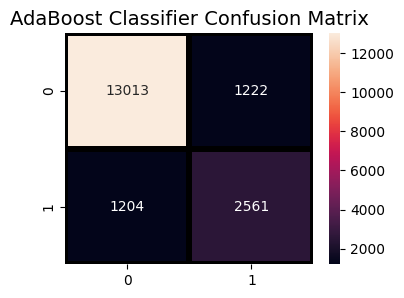

In [ ]:
print(classification_report(y_test, a_preds))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Bu kod, Gradient Boosting sınıflandırıcısını kullanarak modelin eğitimini yapar ve test verisi üzerinde tahminlerde bulunur. İlk olarak, GradientBoostingClassifier() sınıfından bir model oluşturulup fit() fonksiyonu ile eğitim verileri (X_train, y_train) üzerinde eğitilir. Ardından, predict() fonksiyonu ile test verileri (X_test) üzerinde tahminler yapılır. Son olarak, accuracy_score() fonksiyonu ile modelin doğruluk oranı hesaplanır ve yazdırılır.

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier 0.8752222222222222


              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14235
           1       0.72      0.67      0.69      3765

    accuracy                           0.88     18000
   macro avg       0.82      0.80      0.81     18000
weighted avg       0.87      0.88      0.87     18000



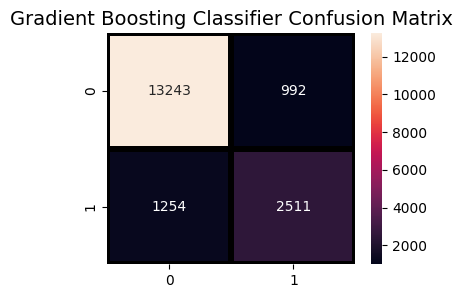

In [ ]:
print(classification_report(y_test, gb_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()